In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("bank_churn.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4398,4399,15707007,Onio,743,France,Female,39,8,0.00,1,1,0,94263.44,0
5260,5261,15731281,Ozuluonye,704,Germany,Female,35,3,154206.07,2,1,1,40261.49,0
462,463,15670039,Sun,509,Spain,Female,25,3,108738.71,2,1,0,106920.57,0
7701,7702,15702801,Ts'ao,677,France,Female,29,3,86616.35,1,0,0,91903.90,1
7136,7137,15689781,Ts'ai,826,France,Female,49,0,0.00,1,0,0,178709.98,1


In [3]:
df1 = df.drop(['CustomerId','RowNumber', 'Surname'], axis='columns')

In [4]:
df1.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8927,626,France,Female,39,0,0.00,2,1,1,83295.09,0
7306,837,France,Female,38,2,0.00,2,1,1,46395.21,0
5734,768,France,Male,54,8,69712.74,1,1,1,69381.05,0
1521,507,Spain,Female,29,6,0.00,2,0,1,94780.90,0
2887,703,Germany,Female,26,1,97331.19,1,1,0,63717.49,0


In [5]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df1['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
df1['Gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [12]:
df1.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4837,803,France,0,28,3,0.00,2,1,0,159654.00,0
5934,765,France,0,34,9,91835.16,1,0,0,138280.17,0
5735,585,Spain,1,44,4,0.00,2,0,1,101728.46,0
8026,607,France,1,33,8,91301.72,1,0,1,130824.57,0
3093,627,Spain,0,41,5,100880.76,1,0,1,134665.25,0


In [15]:
df2 = pd.get_dummies(data=df1, columns=['Geography'])

In [16]:
df2

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [17]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [26]:
#df2.sample(5)
df2.shape

(10000, 13)

In [20]:
X = df2.drop('Exited', axis='columns')
y = df2['Exited']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [27]:
X_train.shape

(8000, 12)

In [29]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(12,), activation='relu'), # input shape matching amount of columns
    #keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 0.5802 - accuracy: 0.7291
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7992
Epoch 3/50
250/250 [==============================] - 0s 941us/step - loss: 0.4683 - accuracy: 0.8004
Epoch 4/50
250/250 [==============================] - 0s 929us/step - loss: 0.4486 - accuracy: 0.8085
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8157
Epoch 6/50
250/250 [==============================] - 0s 993us/step - loss: 0.4347 - accuracy: 0.8149
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.8119
Epoch 8/50
250/250 [==============================] - 0s 965us/step - loss: 0.4348 - accuracy: 0.8111
Epoch 9/50
250/250 [==============================] - 0s 917us/step - loss: 0.4293 - accuracy: 0.8112
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4248 - accura

In [31]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 966us/step - loss: 0.3672 - accuracy: 0.8480


[0.367190420627594, 0.8479999899864197]

In [32]:
yp = model.predict(X_test)

In [34]:
yp[:10]

array([[0.0421139 ],
       [0.08358204],
       [0.09446475],
       [0.12513003],
       [0.07568222],
       [0.16264158],
       [0.01887092],
       [0.3857712 ],
       [0.02146471],
       [0.85812664]], dtype=float32)

In [36]:
y_pred = []

for element in yp:
    if element > .5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [37]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [38]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.71      0.42      0.53       405

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



Text(69.0, 0.5, 'Truth')

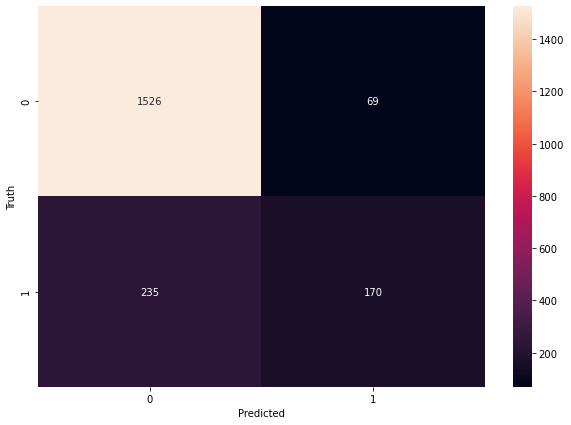

In [39]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')